In [1]:
#question1
### i have created csv file using the data given in question
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
q1=pd.read_csv('ann assignment1 q1.csv')
q1.head()
import numpy
df=q1.iloc[0:6]
tx=df.to_numpy()
i=0
X1=[]
Y1=[]
while i<6:
    Y=tx[i][3]
    X=[tx[i][1],tx[i][2]]
    X1.append(X)
    Y1.append(Y)
    i+=1
## training
x_train=numpy.array(X1)
y_train=numpy.array(Y1)
import random
import numpy as np 
w=np.array([2.0,-2.0])
b=np.array([2.0])
learning_rate=0.7


### perceptron learning rule
for i in range(len(y_train)):
    outi=np.add(np.matmul(w,x_train[i]),b)
    target=y_train[i]
    if outi > 0:
        out=1
    else:
        out=0
    delta_w1=np.multiply(np.subtract(target,out),x_train[i])
    delta_w=np.multiply(delta_w1,learning_rate)
    w+=delta_w
### testing data
import numpy
df2=q1.iloc[6:8]
tx2=df2.to_numpy()
i=0
X2=[]
Y2=[]
while i<2:
    Y=tx[i][3]
    X=[tx[i][1],tx[i][2]]
    X2.append(X)
    Y2.append(Y)
    i+=1
x_test=numpy.array(X2)
y_test=numpy.array(Y2)
y_pred=[]
for j in range(len(y_test)):
    Out=np.add(np.matmul(w,x_test[j]),b)
    if Out < 0:
        out=1
    else:
        out=0
    y_pred.append(out)
    
    


In [2]:
#continue 1
Out

array([-0.2265])

In [3]:
# continue 1
y_pred

[0, 1]

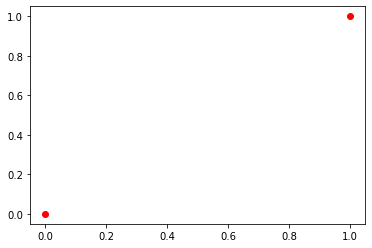

In [6]:
plt.plot(y_test,y_pred, 'ro')

In [59]:
#question2
#method1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
##initialisation
iris = datasets.load_iris()
df = pd.DataFrame({
    'x': iris.data[:,0],
    'y': iris.data[:,1],
    'cluster' : iris.target
})
df
centroids = {}
for i in range(0,3):
    result_list = []
    result_list.append(df.loc[df['cluster'] == i]['x'].mean())
    result_list.append(df.loc[df['cluster'] == i]['y'].mean())
    
    centroids[i] = result_list

In [60]:
centroids

{0: [5.005999999999999, 3.428000000000001],
 1: [5.936, 2.7700000000000005],
 2: [6.587999999999998, 2.9739999999999998]}

Text(0, 0.5, 'Sepal Width')

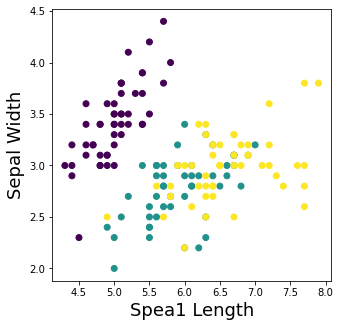

In [61]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], c=iris.target)
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

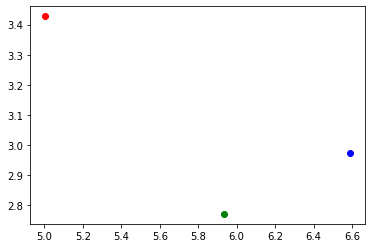

In [62]:
#Defining colors and ploting centroids for all clusters
colmap = {0: 'r', 1: 'g', 2: 'b'}
for i in range(3):
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i])
plt.show()

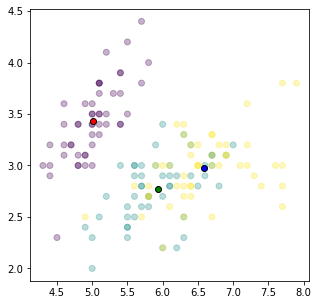

In [63]:
#showing complete graph
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], c=iris.target,alpha = 0.3)
colmap = {0: 'r', 1: 'g', 2: 'b'}
col = [0,1]
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], c=colmap[i], edgecolor='k')
plt.show()

In [64]:
#Assignment function : Calculating distance and updating dataFrame
def assignment(df, centroids):
    for i in range(3):
        # sqrt((x1 - x2)^2 + (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df
df = assignment(df, centroids)
df

,x,y,cluster,distance_from_0,distance_from_1,distance_from_2,closest,color
0,5.1,3.5,0,0.118406,1.109863,1.578233,0,r
1,4.9,3.0,0,0.440931,1.061224,1.688200,0,r
2,4.7,3.2,0,0.381602,1.308662,1.901478,0,r
3,4.6,3.1,0,0.521939,1.376153,1.991989,0,r
4,5.0,3.6,0,0.172105,1.250998,1.706933,0,r
...,...,...,...,...,...,...,...,...
145,6.7,3.0,2,1.747232,0.797870,0.114978,2,b
146,6.3,2.5,2,1.592363,0.453206,0.554635,1,g
147,6.5,3.0,2,1.554098,0.609094,0.091761,2,b
148,6.2,3.4,2,1.194328,0.683078,0.576212,2,b


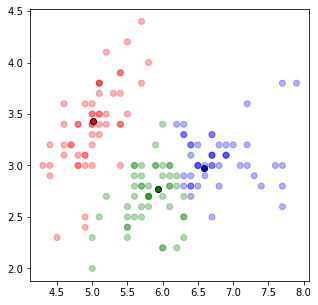

In [65]:
#Visualisation of clusters with colors
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], edgecolor='k')

plt.show()

In [66]:
#Update function : Updating the centroids
def update(k):
    for i in range(3):
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k
centroids = update(centroids)
centroids

{0: [5.00943396226415, 3.383018867924529],
 1: [5.806122448979591, 2.693877551020408],
 2: [6.802083333333331, 3.0687499999999996]}

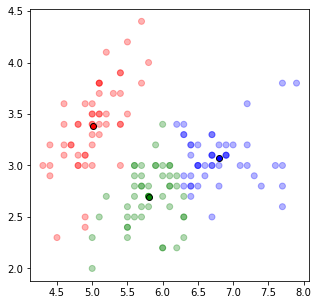

In [67]:
#Visualising the graph with updated centroids
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], edgecolor='k')

plt.show()

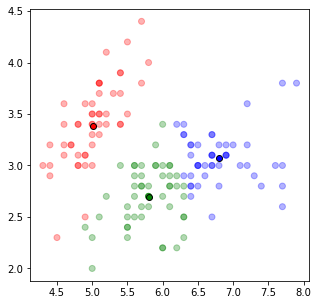

In [68]:
#Repeat assignment stage to to ressign the points with clusters
df = assignment(df, centroids)
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i], edgecolor='k')
plt.show()

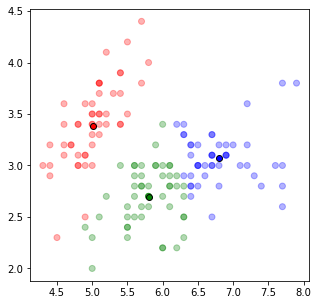

In [69]:
#Visualising the updated graph
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i], edgecolor='k')
plt.show()

In [70]:
#Continuing until all assigned clusters don't change any more
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

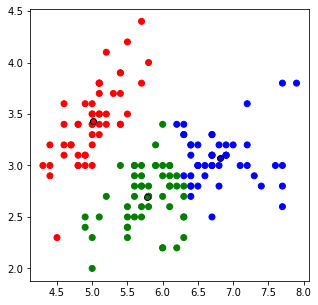

In [71]:
##final
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'])
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i], edgecolor='k')

plt.show()

In [90]:
#question 3b
#partb using radial basis function

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
#x value -10 to 10 with an increment 0.1
#target function y=sinx/x, x=-10+0.1t

xt=[]
for i in range(0,5000):
    if i<5001:
        X=-10+0.004*i
        xt.append(X)


yt=[]
for j in range(len(xt)):
    if xt[j]!=0:
        Y=math.sin(xt[j])/xt[j]
        yt.append(Y)
    else:
        yt.append(1)


In [91]:
Noise=[]
for i in range(0,2500):
    r =-0.2 + 0.4*random.randrange(1,2500)
    Noise.append(r)
noise=np.array(Noise)
    

In [92]:
#continue3b
from sklearn.model_selection import train_test_split
X1_train,X1_test,Y1_train,Y1_test=train_test_split(xt,yt,test_size=0.5)

In [93]:
#continue 3b
x_train=np.array(X1_train)
x_test=np.array(X1_test)
y_test=np.array(Y1_test)
y_train=np.array(Y1_train)


In [94]:
y_test.shape

(2500,)

In [95]:
#continue 3b
T=y_train
import random
l=10
w=[]
b=[]
for i in range(l):
    W=random.randrange(-10, 10)
    w.append(W)
for i in range(l):    
    B=random.randrange(-10, 10)
    b.append(B)
s=[]

h=s[:][:]
def rbf(x, c, sigma):
    return np.exp(-(x - c) ** 2 / (2 * (sigma ** 2)))
def fit(w,x,b):
    import math
    for i in range(0,2500):
        fu=[]
        S=np.add(np.multiply(w,x[i]),b)
        for j in range(0,10):
            O=rbf(S[j], 1, 20)
            fu.append(O)
        h.append(fu)
    np.shape(h)
    Ht=np.array(h)
    return Ht
H=fit(w,x_train,b)
import numpy as np
ht=H.transpose()
def pseudoinverse(H,ht):
    f=np.matmul(ht,H)
    g=np.linalg.inv(f)
    return np.matmul(g,ht)


In [96]:
#continue 3b
G=pseudoinverse(H,ht)
Wn=np.matmul(G,T)



In [97]:
#continue 3b
Wn

array([ -3.74950917,  -4.18028678,  35.2953799 , -59.33069493,
         3.04811596,  10.8761264 ,  -9.28143355,  28.0842976 ,
         2.65742149,  -1.7635528 ])

In [98]:
#testing data
H_test=fit(Wn,x_test,b)
H_test.shape



(5000, 10)

In [99]:
## removing previous stored elements
c = []
def Hnew(H_test,H):
    for tar in H_test:
        if tar not in H :
            c.append(tar)
    return c
h_new=Hnew(H_test,H)


In [100]:
np.shape(h_new)

(2500, 10)

In [102]:
y_pred=np.matmul(h_new,Wn)
y_pred.shape


(2500,)

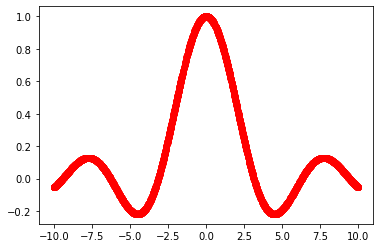

In [104]:
plt.plot(x_train,y_train, 'ro')

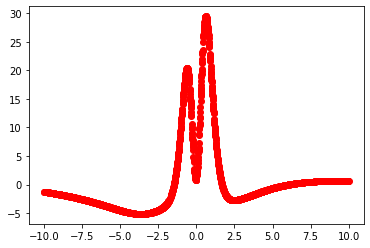

In [105]:
plt.plot(x_test,y_pred, 'ro')

In [29]:
###question3a
import numpy as np
import math
x_vals=[]
for i in range(0,5000):
    if i<5001:
        X=-10+0.004*i
        x_vals.append(X)


y_vals=[]
for j in range(len(x_vals)):
    if x_vals[j]!=0:
        Y=math.sin(x_vals[j])/x_vals[j]
        y_vals.append(Y)
    else:
        y_vals.append(1)


In [30]:
from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test = train_test_split(x_vals, y_vals, test_size=0.50)
x_train=np.array(x1_train)
x_test=np.array(x1_test)
y_test=np.array(y1_test)
y_train=np.array(y1_train)

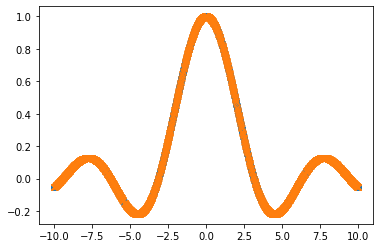

In [31]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(x_train, y_train, 'o')
plt.plot(x_test, y_test, 'x')
plt.show()

In [32]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [33]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(
    hidden_layer_sizes=[30],
    max_iter=1000,
)



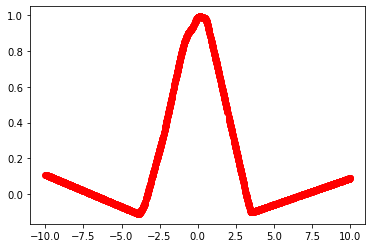

In [34]:
mlp.fit(x_train,y_train)

predictions = mlp.predict(x_test)
plt.plot(x_test, predictions, 'ro')
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

0.00539064184651081

In [36]:
mlp = MLPRegressor(
    hidden_layer_sizes=[10,30,10],
    max_iter=1000,
)
predictions

array([ 0.49727404,  0.07084204, -0.07679558, ..., -0.0883005 ,
        0.08182628,  0.00812558])

In [40]:
#question4
#pso
import random
import numpy as np 
import math

W = 0.5
c1 = 2
c2 = 2 

n_iterations = int(input("Inform the number of iterations: "))
target_error = float(input("Inform the target error: "))
n_particles = int(input("Inform the number of particles: "))

class Particle():
    def __init__(self):
        self.position = np.array([(-1) ** (bool(random.getrandbits(1))) * random.random()*10, (-1)**(bool(random.getrandbits(1))) * random.random()*10])
        self.pbest_position = self.position
        self.pbest_value = float('inf')
        self.velocity = np.array([0,0])

    def __str__(self):
        print("I am at ", self.position, " meu pbest is ", self.pbest_position)
    
    def move(self):
        self.position = self.position + self.velocity


class Space():

    def __init__(self, target, target_error, n_particles):
        self.target = target
        self.target_error = target_error
        self.n_particles = n_particles
        self.particles = []
        self.gbest_value = float('inf')
        self.gbest_position = np.array([random.random()*10, random.random()*10])

    def print_particles(self):
        for particle in self.particles:
            particle.__str__()
   
    def fitness(self, particle):
        x=particle.position[0]
        y=particle.position[1]
        return y+15*(math.sin(2*x))**2+(x-2)**2-160

    def set_pbest(self):
        for particle in self.particles:
            fitness_cadidate = self.fitness(particle)
            if(particle.pbest_value > fitness_cadidate):
                particle.pbest_value = fitness_cadidate
                particle.pbest_position = particle.position
            

    def set_gbest(self):
        for particle in self.particles:
            best_fitness_cadidate = self.fitness(particle)
            if(self.gbest_value > best_fitness_cadidate):
                self.gbest_value = best_fitness_cadidate
                self.gbest_position = particle.position

    def move_particles(self):
        for particle in self.particles:
            global W
            new_velocity = (W*particle.velocity) + (c1*random.random()) * (particle.pbest_position - particle.position) + \
                            (random.random()*c2) * (self.gbest_position - particle.position)
            particle.velocity = new_velocity
            particle.move()
            

search_space = Space(1, target_error, n_particles)
particles_vector = [Particle() for _ in range(search_space.n_particles)]
search_space.particles = particles_vector
search_space.print_particles()

iteration = 0
while(iteration < n_iterations):
    search_space.set_pbest()    
    search_space.set_gbest()

    if(abs(search_space.gbest_value - search_space.target) <= search_space.target_error):
        break

    search_space.move_particles()
    iteration += 1
    
print("The best solution is: ", search_space.gbest_position, " in n_iterations: ", iteration)

Inform the number of iterations: 2
Inform the target error: 20
Inform the number of particles: 30
I am at  [-0.71891211 -5.37187292]  meu pbest is  [-0.71891211 -5.37187292]
I am at  [5.19031108 8.99790858]  meu pbest is  [5.19031108 8.99790858]
I am at  [-9.02048108  3.90642846]  meu pbest is  [-9.02048108  3.90642846]
I am at  [1.90977159 5.59166751]  meu pbest is  [1.90977159 5.59166751]
I am at  [0.3383015  4.28704906]  meu pbest is  [0.3383015  4.28704906]
I am at  [1.35081868 3.7335791 ]  meu pbest is  [1.35081868 3.7335791 ]
I am at  [-8.4387442  -6.62769474]  meu pbest is  [-8.4387442  -6.62769474]
I am at  [4.08468744 0.77246381]  meu pbest is  [4.08468744 0.77246381]
I am at  [-1.4692377   0.06199642]  meu pbest is  [-1.4692377   0.06199642]
I am at  [9.39929323 8.71366521]  meu pbest is  [9.39929323 8.71366521]
I am at  [-0.84392836  2.95038639]  meu pbest is  [-0.84392836  2.95038639]
I am at  [-3.01814371 -0.20282937]  meu pbest is  [-3.01814371 -0.20282937]
I am at  [-4.7